###**Лабораторная работа 1. Сверточные сети**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y

In [ ]:
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

In [ ]:
print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12049
Number of filtered test examples: 1968


In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', 
                                 input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1,
                    validation_data=(x_test, y_test))

cnn_results = model.evaluate(x_test, y_test)

Epoch 1/10
95/95 [==============================] - 28s 296ms/step - loss: 0.0390 - accuracy: 0.9861 - val_loss: 0.0024 - val_accuracy: 0.9990
Epoch 2/10
95/95 [==============================] - 28s 295ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3/10
95/95 [==============================] - 28s 295ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0037 - val_accuracy: 0.9990
Epoch 4/10
95/95 [==============================] - 28s 294ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 3.9839e-04 - val_accuracy: 1.0000
Epoch 5/10
95/95 [==============================] - 28s 294ms/step - loss: 7.3347e-04 - accuracy: 0.9998 - val_loss: 5.4433e-04 - val_accuracy: 1.0000
Epoch 6/10
95/95 [==============================] - 28s 295ms/step - loss: 3.9694e-04 - accuracy: 0.9999 - val_loss: 4.4750e-04 - val_accuracy: 1.0000
Epoch 7/10
95/95 [==============================] - 28s 296ms/step - loss: 4.0121e-04 - accuracy: 0.9999 - val_loss: 0.001

62/62 - 1s - loss: 4.7361e-05 - accuracy: 1.0000


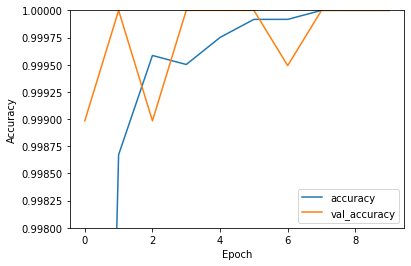

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.ylim([0.998, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Вероятность правильного распознавания на тестовой выборке 100%